In [138]:
# !pip install seaborn
# !pip install scipy
# !pip install statsmodels

In [139]:
import numpy as np
import statistics as st
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [181]:
# константы
n = 100             # объём выборки
mean = 6            # мат ожидание
std = 2             # СКО

random_arr = np.random.normal(mean, std, n)
random_arr.sort()                           # вариационный ряд
r_arr_pdf = norm.pdf(random_arr, mean, std) # плотность распределения
r_arr_cdf = norm.cdf(random_arr, mean, std) # функция распределения
np.round(np.var(random_arr), 2)

3.62

# ТЕОРИТИЧЕСКАЯ ЧАСТЬ

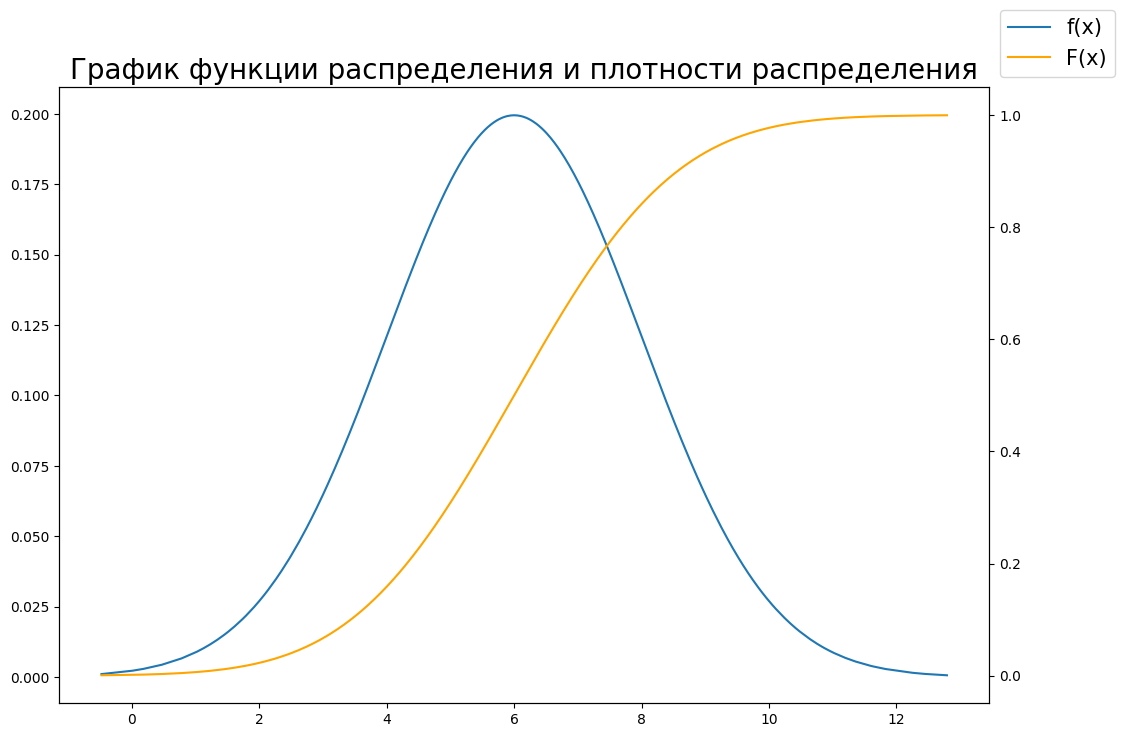

In [136]:
# создадим сетку из одной ячейки
fig, ax_left = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax_right = ax_left.twinx()

# на правой оси y построим график функции распределения
ax_right.plot(random_arr, r_arr_cdf, color='orange', label='F(x)')

# на левой оси y построим график плотности распределения
ax_left.plot(random_arr, r_arr_pdf, label='f(x)')

fig.legend(loc='lower left',
           bbox_to_anchor=(1, 1),
           bbox_transform=ax_right.transAxes,
           prop={'size': 15})
ax_left.set_title('График функции распределения и плотности распределения', size=20)

plt.show()

## Основные статистики(теор. часть)

In [53]:
# Основные статистики
total = np.sum(random_arr)                               # сумма
median = np.median(random_arr)                           # медиана
var = np.var(random_arr)                                 # дисперсия
asd = np.std(random_arr)                                 # среднеквадратичное отклонение
mse = np.sqrt(asd)/n                                     # cреднеквадратичная ошибка
r_arr_min = np.min(random_arr)                           # минимум
r_arr_max = np.max(random_arr)                           # максимум
uq = np.quantile(random_arr, 0.75)                       # верхний квантиль
lq = np.quantile(random_arr, 0.25)                       # нижний квантиль
coef_asym = skew(random_arr, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(random_arr, axis=0, bias=True)  # коэффициент эксцесса

print(f'Вариационный ряд = {random_arr[:50]}')
print(f'Сумма = {total}')
print(f'Медиана = {median}')
print(f'Дисперсия = {var}')
print(f'Стандартное отклонение = {asd}')
print(f'Среднеквадратичная ошибка = {mse}')
print(f'Минимум = {r_arr_min}')
print(f'Максимум = {r_arr_max}')
print(f'Размах = {r_arr_max - r_arr_min}')
print(f'Верхний квантиль = {uq}')
print(f'Нижний квантиль = {lq}')
print(f'Межквантильный размах = {uq - lq}')
print(f'Коэф. ассиметрии = {coef_asym}')
print(f'Коэф. эксцесса = {coef_kurtosis}')

Вариационный ряд = [2.50275628 5.02679513 5.84654175 6.45111465 7.42534256 7.43421795
 8.00205239 8.35676843 8.40420249 9.55451032]
Сумма = 69.00430195311428
Медиана = 7.4297802542184535
Дисперсия = 3.736303682429148
Стандартное отклонение = 1.9329520641829554
Среднеквадратичная ошибка = 0.0013903064641232722
Минимум = 2.502756280216059
Максимум = 9.55451032478625
Размах = 7.051754044570191
Верхний квантиль = 8.268089419390323
Нижний квантиль = 5.997684975525316
Межквантильный размах = 2.270404443865007
Коэф. ассиметрии = -0.9148173532851366
Коэф. эксцесса = 0.21259680321224161


# Практическая часть

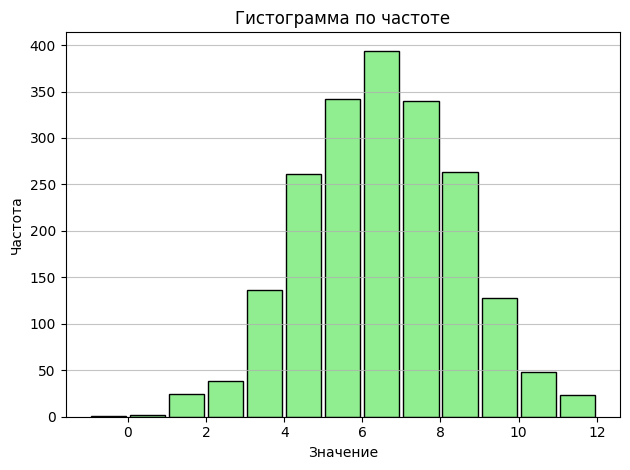

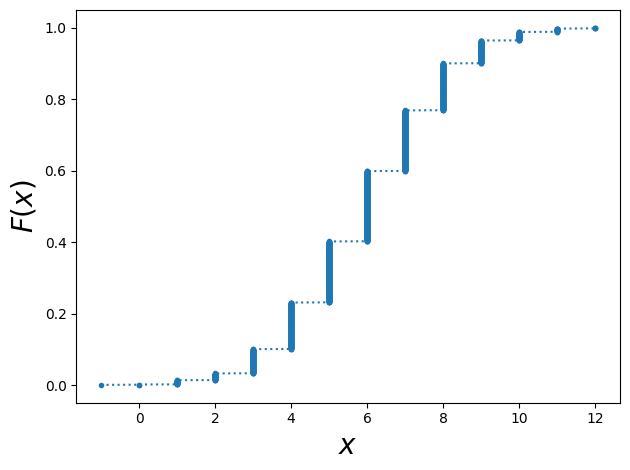

In [29]:
random_arr2 = np.round(np.random.normal(mean, std, n))           # вариационный ряд нормального распределения
random_arr2.sort()
r_arr_pdf2 = norm.pdf(random_arr2, mean, std)                        # плотность распределения
r_arr_cdf2 = norm.cdf(random_arr2, mean, std)                        # функция распределения

# гистограмма по частоте
bins = list(np.arange(np.min(random_arr2), np.max(random_arr2) + 0.2, 1.0))
plt.hist(random_arr2, bins = bins, color ='lightgreen', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма по частоте')
plt.tight_layout()
plt.show()

# график эмперической функции
ecdf = ECDF(random_arr2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
# sns.kdeplot(x2, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()

In [30]:
total = np.sum(random_arr2)                               # сумма
median = np.median(random_arr2)                           # медиана
var = np.var(random_arr2)                                 # дисперсия
asd = np.std(random_arr2)                                 # среднеквадратичное отклонение
mse = np.sqrt(asd)/n                                     # cреднеквадратичная ошибка
r_arr_min = np.min(random_arr2)                           # минимум
r_arr_max = np.max(random_arr2)                           # максимум
uq = np.quantile(random_arr2, 0.75)                       # верхний квантиль
lq = np.quantile(random_arr2, 0.25)                       # нижний квантиль
coef_asym = skew(random_arr2, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(random_arr2, axis=0, bias=True)  # коэффициент эксцесса

print(f'Вариационный ряд = {random_arr2}')
print(f'Сумма = {total}')
print(f'Медиана = {median}')
print(f'Дисперсия = {var}')
print(f'Стандартное отклонение = {asd}')
print(f'Среднеквадратичная ошибка = {mse}')
print(f'Минимум = {r_arr_min}')
print(f'Максимум = {r_arr_max}')
print(f'Размах = {r_arr_max - r_arr_min}')
print(f'Верхний квантиль = {uq}')
print(f'Нижний квантиль = {lq}')
print(f'Межквантильный размах = {uq - lq}')
print(f'Коэф. ассиметрии = {coef_asym}')
print(f'Коэф. эксцесса = {coef_kurtosis}')

Вариационный ряд = [-1. -0. -0. ... 12. 12. 12.]
Сумма = 11998.0
Медиана = 6.0
Дисперсия = 3.934999
Стандартное отклонение = 1.9836831904313752
Среднеквадратичная ошибка = 0.000704216442301544
Минимум = -1.0
Максимум = 12.0
Размах = 13.0
Верхний квантиль = 7.0
Нижний квантиль = 5.0
Межквантильный размах = 2.0
Коэф. ассиметрии = -0.004765052027880377
Коэф. эксцесса = -0.10939034022741634


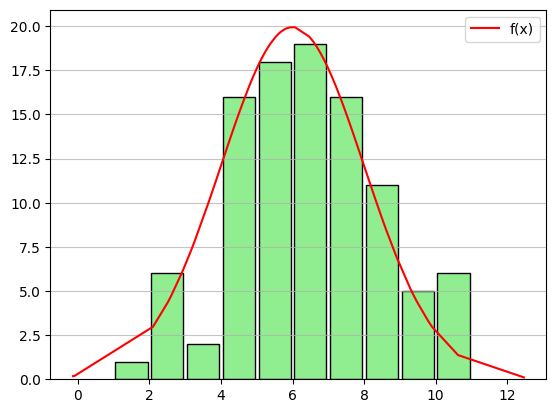

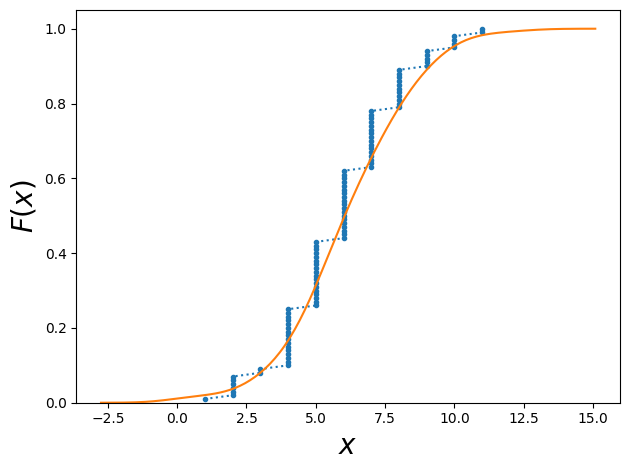

In [8]:
# Сравнение результатов
plt.plot(random_arr, r_arr_pdf * n, color='r', label='f(x)')
bins = list(np.arange(np.min(random_arr2), np.max(random_arr2) + 0.2, 1.0))
plt.hist(random_arr2, bins = bins, color ='lightgreen', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()

ecdf = ECDF(random_arr2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
sns.kdeplot(random_arr, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()


2.449489742783178